In [1]:
library(rpart)
library(rpart.plot)

#### Criando o dataframe

In [2]:
df <- data.frame(
    marital_status = as.factor(c("Single","Married","Single","Married","Single")),
    income = c(1000, 2000, 3500, 4000, 5000),
    buy = c(0, 1, 0, 1, 1)
)

#### Classificação: transformar a resposta em faot (0/1 -> No/Yes)

In [3]:
df$buy <- factor(df$buy, levels = c(0,1), labels = c("No","Yes"))

df

marital_status,income,buy
<fct>,<dbl>,<fct>
Single,1000,No
Married,2000,Yes
Single,3500,No
Married,4000,Yes
Single,5000,Yes


#### Critério GINI

In [4]:
decision_tree <- rpart(formula = buy ~ marital_status + income,
                      data = df,
                      method = "class",
                      parms = list(split = "gini"), # "gini" ou "information" para entropia
                      control = rpart.control(cp = 0.0, # deixar crescer (poucos dados)
                                              minsplit = 2,
                                              minbucket = 1,
                                              maxdepth = 4,
                                              xval = 10))

decision_tree

n= 5 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 5 2 Yes (0.4000000 0.6000000)  
  2) marital_status=Single 3 1 No (0.6666667 0.3333333)  
    4) income< 4250 2 0 No (1.0000000 0.0000000) *
    5) income>=4250 1 0 Yes (0.0000000 1.0000000) *
  3) marital_status=Married 2 0 Yes (0.0000000 1.0000000) *

#### Gráfico da árvore

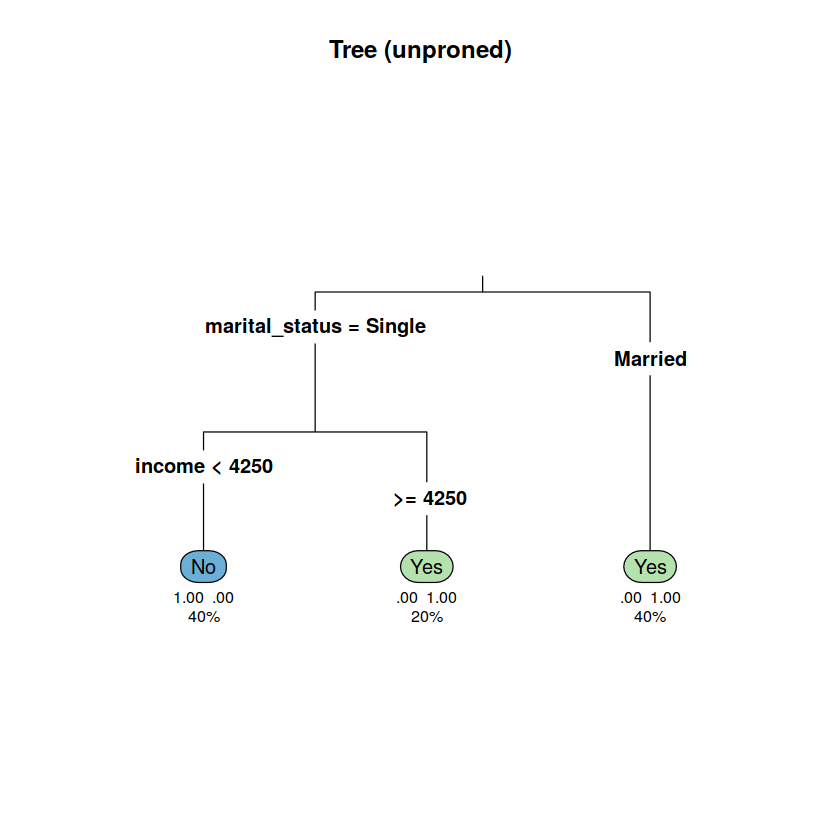

In [5]:
rpart.plot(decision_tree,
           type = 3,
          extra = 104,
          under =TRUE,
          faclen = 0,
          fallen.leaves = TRUE,
          main = "Tree (unproned)")

#### Novo dataframe para prefição

In [6]:
new_df <- data.frame(marital_status = factor(c("Single","Single","Married"),
                                            levels = levels(df$marital_status)),
                    income = c(3000, 6000, 2500))

new_df

marital_status,income
<fct>,<dbl>
Single,3000
Single,6000
Married,2500


#### Predição

In [7]:
prediction_new_probability <- predict(decision_tree, new_df, type = "prob")[,"Yes"]
prediction_new_classes <-predict(decision_tree, new_df, type = "class")

#### Criando novo dataframe

In [8]:
new_df <- prediction_new_classes
new_df

1   2   3 
 No Yes Yes 
Levels: No Yes